# **Exploratory Data Analysis Lab**


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

### Determine how the data is distributed


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


The distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

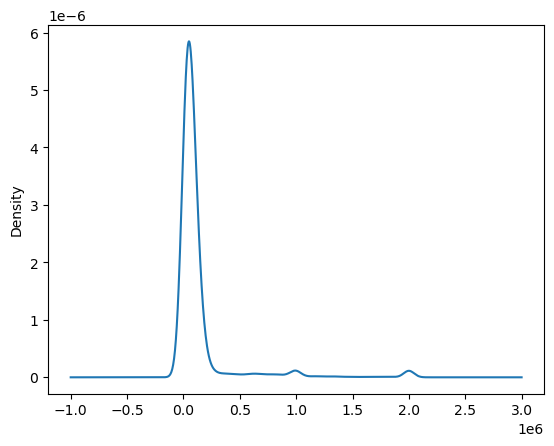

In [4]:
df['ConvertedComp'].plot(kind='kde')

The histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

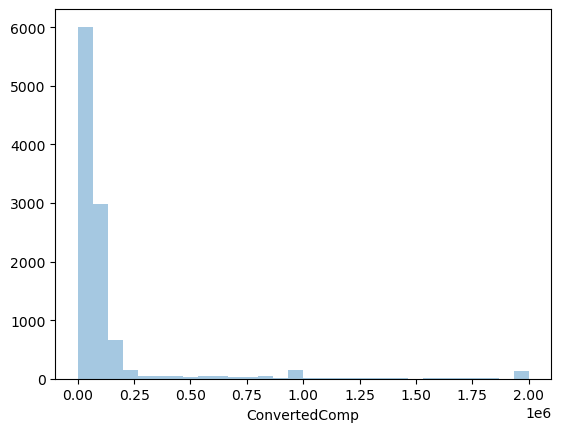

In [5]:
sns.distplot(df['ConvertedComp'],bins=30, kde=False)

The median of the column `ConvertedComp`


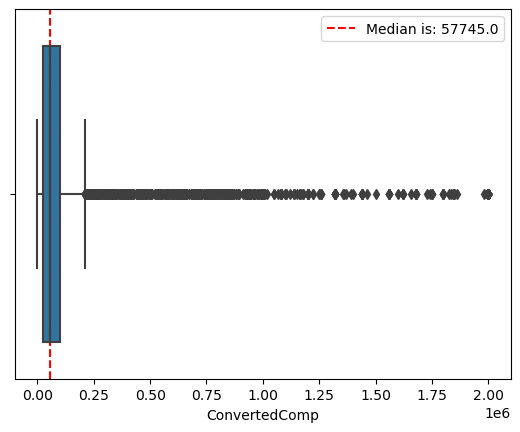

In [6]:
sns.boxplot(x=df['ConvertedComp'])
median = df['ConvertedComp'].median()
plt.axvline(median, color='r', linestyle='--', label=f'Median is: {median}')
plt.legend()
plt.show()

Number of responders identified themselves only as a **Man**


In [7]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Median ConvertedComp of responders identified themselves only as a **Woman**


In [8]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

The five number summary for the column `Age`

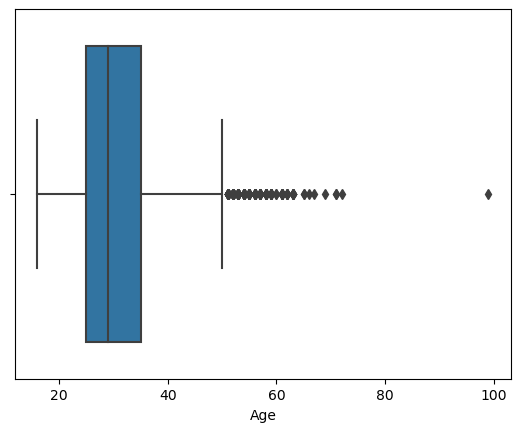

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


In [9]:
sns.boxplot(x=df['Age'])
plt.show()
print(df['Age'].describe().tail(5))

Histogram of the column `Age`.


<AxesSubplot:xlabel='Age'>

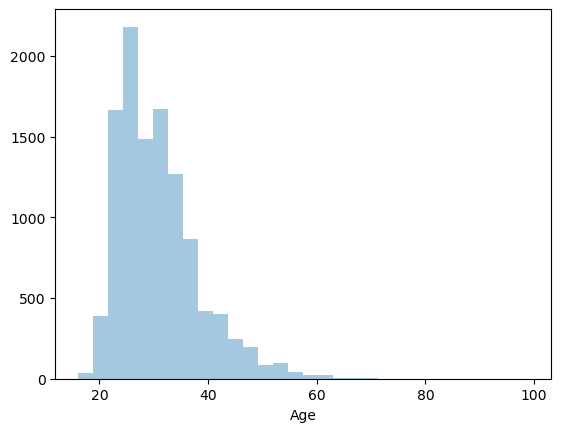

In [10]:
sns.distplot(df['Age'],bins=30, kde=False)

## Outliers


### Finding outliers


Outliers exist in the column `ConvertedComp` or not? Using a box plot.

<AxesSubplot:xlabel='ConvertedComp'>

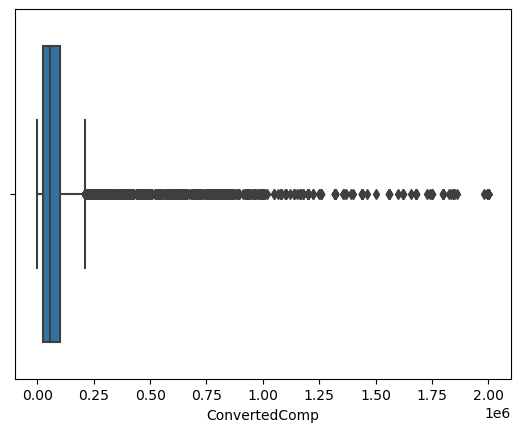

In [11]:
sns.boxplot(x=df['ConvertedComp'])

The Inter Quartile Range for the column `ConvertedComp`


In [12]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

73132.0


The upper and lower bounds.


In [13]:
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

print(f'({lower_bound},{upper_bound})')

(-82830.0,209698.0)


Number of outliers in the `ConvertedComp` column.

In [14]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

num_outliers = outliers.shape[0]

print(num_outliers)

879


New dataframe by removing the outliers from the `ConvertedComp` column


In [15]:
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


print(f'{df.shape[0]} --> {new_df.shape[0]}')

11398 --> 9703


In [16]:
new_df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Correlation between `Age` and all other numerical columns.


In [17]:
df_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Age'])
correlation = df_numeric.corrwith(df['Age'])

correlation

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
dtype: float64

In [18]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000
